In [5]:
import seaborn as sns
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings("ignore", message="numpy.ufunc size changed")
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option('display.max_columns', None)
import re
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from scipy.stats import chi2_contingency
from bs4 import BeautifulSoup
import requests
import re 
import time
import json
import pickle
import numpy as np
import math

In [6]:
def get_sub_genres_by_wikipedia(main_genre,sub_counts,urls):
    wiki = "https://de.wikipedia.org"
    dic_genre_w_sub = dict()
    offset = 0
    for x, genre in enumerate(main_genre):
        sub_genre_list = list()
        for i in range(0,sub_counts[x]): 
            url_sub = wiki+urls[x+offset+i]
            response = requests.get(url_sub)
            time.sleep(2)
            print(genre + " mit Url: " +url_sub)
            soup = BeautifulSoup(response.content, "html.parser")
            result = soup.select("div > ul > li > a")
            y = 0
            match = re.search(r'\bwiki/Kategorie:\b',result[y].get('href'))
            if match:
                TF = True
            else:
                TF = False
            while (TF == False):
                sub_genre_list.append(result[y].get_text())
                #print(result[y].get_text())
                y+=1
                match = re.search(r'\bwiki/Kategorie:\b',result[y].get('href'))
                if match:
                    TF = True
                else:
                    TF = False
        dic_genre_w_sub.update({genre:sub_genre_list})
        offset = offset + (sub_counts[x]-1)
    return dic_genre_w_sub

In [11]:
def clean_genre(feature):
    #feature_list = list()
    if isinstance(feature, list):
        while any([type(element) is list for element in feature]):
            i = 0
            #print(feature)
            while i < len(feature):
                #print(i)
                if type(feature[i]) is list: 
                    if feature[i]:
                        #print(feature)
                        for elem in feature[i]:
                            feature.append(elem)
                        feature.pop(i)
                        #print(feature)
                    else:
                        #print("empty list")
                        feature.pop(i)
                else:
                    i+=1
        return feature
    else:
        return feature

In [277]:
# def countoverlappingdistinct(pattern, thestring):
#     total = 0
#     start = 0
#     there = re.compile(pattern, flags=re.IGNORECASE)
#     while True:
#         mo = there.search(thestring, start)
#         if mo is None: 
#             return total
#         total += 1
#         start = 1 + mo.start()

In [126]:
def get_main_genre(genres_df):
    if isinstance(genres_df, list):
        final_genre = []
        max_count = 0
        for genre in music_genre_dic.keys():
            cur_count = 0
            sub_genres = list(music_genre_dic[genre])
            #Appending Main-Genre to Sub-Genres
            sub_genres.append(genre)
            for sub in sub_genres:
                for element in genres_df:
    #                 if len(genres_df) == 1:
    #                     for sep_space in element.split(" "):
    #                     for sep_hyphen in sep_space.split("-"):
    #                         count = len(re.findall(sep_hyphen,sub, flags=re.IGNORECASE))
    #                         cur_count = cur_count + count
    #                else:
                        count = len(re.findall(element,sub, flags=re.IGNORECASE))
                        cur_count = cur_count + count
            if cur_count > max_count:
                max_count = cur_count
                final_genre = [genre]
            elif (cur_count == max_count) and (cur_count != 0):
                final_genre.append(genre)
    #         print("cur_count" + str(cur_count))
    #         print("max_count" + str(max_count))
    #         print("Genre" + genre)
        if len(final_genre) > 1:
            return "Multiple"
        elif len(final_genre) == 1:
            return final_genre[0]
        else:
            return "Undefined"
    else:
        return genres_df

In [5]:
sub_genres_url = ['/wiki/Kategorie:Blues-Stil',
 '/wiki/Kategorie:Country-Musik-Stil',
 '/wiki/Kategorie:Stilrichtung_der_Dark_Music',
 '/wiki/Kategorie:Stilrichtung_Disco',
 '/wiki/Kategorie:Stil_der_elektronischen_Musik',
 '/wiki/Kategorie:Stil_der_elektronischen_Tanzmusik',
 '/wiki/Kategorie:House-Subgenre',
 '/wiki/Kategorie:Techno-Subgenre',
 '/wiki/Kategorie:Folk-Genre',
 '/wiki/Kategorie:Stilrichtung_des_Funk',
 '/wiki/Kategorie:Hip-Hop-Musiksubgenre',
 '/wiki/Kategorie:Jazz-Stil',
 '/wiki/Kategorie:Stilrichtung_der_Lateinamerikanischen_Musik',
 '/wiki/Kategorie:Brasilianischer_Musikstil',
 '/wiki/Kategorie:Stilrichtung_des_Metal',
 '/wiki/Kategorie:Stilrichtung_des_Doom_Metal',
 '/wiki/Kategorie:Stilrichtung_des_Death_Metal',
 '/wiki/Kategorie:Stilrichtung_der_Popmusik',
 '/wiki/Kategorie:Stilrichtung_des_Punk',
 '/wiki/Kategorie:Stilrichtung_des_Reggae',
 '/wiki/Kategorie:Stilrichtung_der_Rockmusik',
 '/wiki/Kategorie:Stilrichtung_des_Rock_%E2%80%99n%E2%80%99_Roll',
 '/wiki/Kategorie:Stilrichtung_des_Ska',
 '/wiki/Kategorie:Genre_der_traditionellen_Musik']

In [127]:
music_genre = ["Blues","Country", "Dark Music","Disco", "Electro","Folk", "Funk", "Hip-Hop","Jazz",
               "Latin", "Metal", "Pop","Punk","Reggae","Rock", "Rock ’n’ Roll", "Ska", "Traditional"]
music_subgenre_count = [1,1,1,1,4,1,1,1,1,2,3,1,1,1,1,1,1,1]

In [174]:
# music_genre_dic = get_sub_genres_by_wikipedia(music_genre,music_subgenre_count,sub_genres_url)

Blues mit Url: https://de.wikipedia.org/wiki/Kategorie:Blues-Stil
Country mit Url: https://de.wikipedia.org/wiki/Kategorie:Country-Musik-Stil
Dark Music mit Url: https://de.wikipedia.org/wiki/Kategorie:Stilrichtung_der_Dark_Music
Disco mit Url: https://de.wikipedia.org/wiki/Kategorie:Stilrichtung_Disco
Electro mit Url: https://de.wikipedia.org/wiki/Kategorie:Stil_der_elektronischen_Musik
Electro mit Url: https://de.wikipedia.org/wiki/Kategorie:Stil_der_elektronischen_Tanzmusik
Electro mit Url: https://de.wikipedia.org/wiki/Kategorie:House-Subgenre
Electro mit Url: https://de.wikipedia.org/wiki/Kategorie:Techno-Subgenre
Folk mit Url: https://de.wikipedia.org/wiki/Kategorie:Folk-Genre
Funk mit Url: https://de.wikipedia.org/wiki/Kategorie:Stilrichtung_des_Funk
Hip-Hop mit Url: https://de.wikipedia.org/wiki/Kategorie:Hip-Hop-Musiksubgenre
Jazz mit Url: https://de.wikipedia.org/wiki/Kategorie:Jazz-Stil
Latin mit Url: https://de.wikipedia.org/wiki/Kategorie:Stilrichtung_der_Lateinamerikanisc

In [186]:
# f = open("music_genre_dictionary.pkl","wb")
# pickle.dump(music_genre_dic,f)
# f.close()

In [178]:
# len(music_genre_dic)

18

In [ ]:
# genre_list = [test['genre'].values[i][x] for i in range(len(test['genre'].values)) for x in range(len(test['genre'].values[i]))]
# #genre_list.count(set(genre_list)[:])

# genre_set = set(genre_list)
# genre_set{1}

#sns.histplot(genre_list, stat = 'count', thresh = 10)

In [7]:
music_genre_dic = pickle.load(open("music_genre_dictionary.pkl", "rb" ))
# music_genre_dic["Rock ’n’ Roll"].append("Rock 'n' Roll")
# music_genre_dic['Rock ’n’ Roll'].append("Rock 'n Roll")
# music_genre_dic['Rock ’n’ Roll'].append("Rock n Roll")
# music_genre_dic['Rock ’n’ Roll'].append("Rock n' Roll")

In [8]:
music_genre_dic.keys()

dict_keys(['Blues', 'Country', 'Dark Music', 'Disco', 'Electro', 'Folk', 'Funk', 'Hip-Hop', 'Jazz', 'Latin', 'Metal', 'Pop', 'Punk', 'Reggae', 'Rock', 'Rock ’n’ Roll', 'Ska', 'Traditional'])

In [9]:
df_songs = pd.read_pickle('full_songlist_all_genres.pickle')
#df_songs = pd.read_pickle('full_songlist_without_duplicates_from_spotify_user.pickle')

In [12]:
# clean the genre concerning nested lists:
df_songs['genre_clean'] = df_songs['genre'].apply(clean_genre)

In [200]:
# df_songs['genre_counter_clean'] = [len(x) for x in df_songs["genre_clean"]]

# Get main genres based on a string-matching ranking within the sub-genre dictionary

In [132]:
# music_genre_dic["Rock ’n’ Roll"]

In [131]:
# music_genre_dic["Rock"]

In [133]:
df_songs["main_genre"] = df_songs["genre_clean"].apply(get_main_genre)

In [135]:
df_temp = df_songs.copy()

In [18]:
df_songs.iloc[0:2,2:4].head()

,artist,genre
0,B.B. King,"[blues, blues rock, classic rock, electric blu..."
1,Albert King,"[blues, blues rock, classic rock, electric blu..."


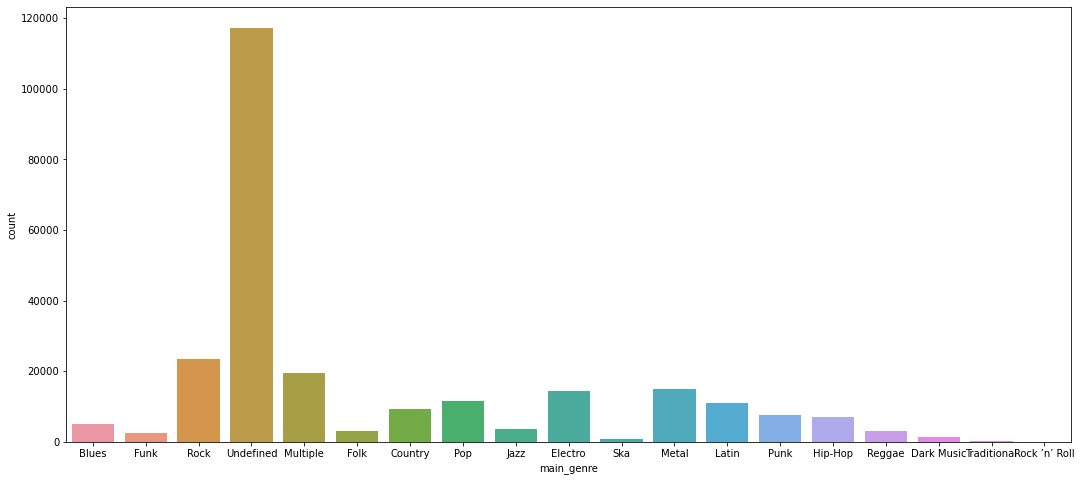

In [137]:
a4_dims = (18, 8)
fig, ax = plt.subplots(figsize=a4_dims)
ax = sns.countplot(ax = ax, x = "main_genre", data = df_songs)

In [138]:
df_songs["main_genre"].value_counts()

Undefined        117319
Rock              23587
Multiple          19443
Metal             14952
Electro           14344
Pop               11449
Latin             10975
Country            9446
Punk               7665
Hip-Hop            6971
Blues              4996
Jazz               3698
Reggae             3159
Folk               3134
Funk               2552
Dark Music         1483
Ska                 938
Traditional         380
Rock ’n’ Roll        13
Name: main_genre, dtype: int64

## Drop songs with undefined or multiple genres:

In [76]:
df_songs.shape

(331063, 19)

In [139]:
df_songs = df_songs[df_songs["main_genre"] != "Undefined"]
df_songs = df_songs[df_songs["main_genre"] != "Multiple"]

In [140]:
df_songs.shape

(194301, 19)

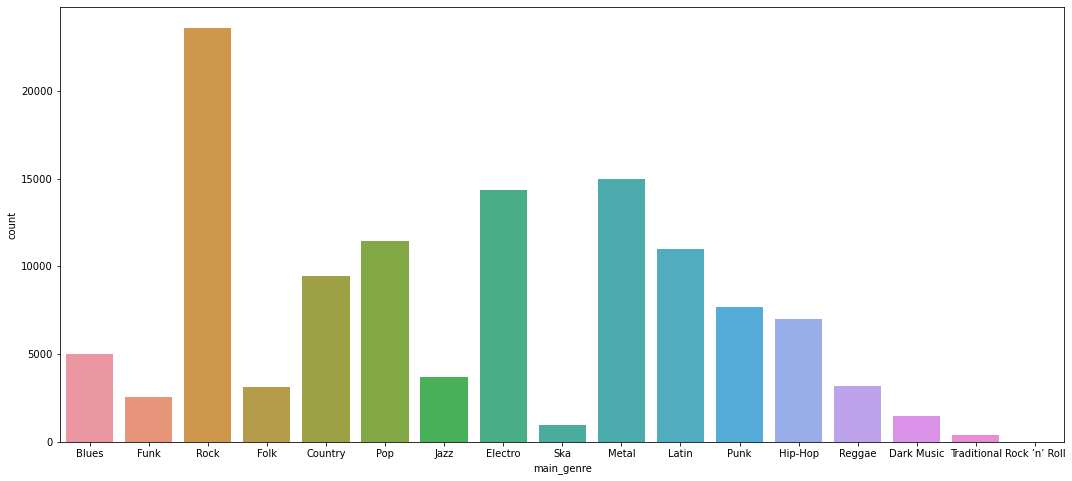

In [141]:
a4_dims = (18, 8)
fig, ax = plt.subplots(figsize=a4_dims)
ax = sns.countplot(ax = ax, x = "main_genre", data = df_songs)

In [145]:
len(df_songs["main_genre"].unique())

18

In [143]:
df_songs["main_genre"].value_counts()

Rock             23587
Metal            14952
Electro          14344
Pop              11449
Latin            10975
Country           9446
Punk              7665
Hip-Hop           6971
Blues             4996
Jazz              3698
Reggae            3159
Folk              3134
Funk              2552
Dark Music        1483
Ska                938
Traditional        380
Rock ’n’ Roll       13
Name: main_genre, dtype: int64

Since Rock and Rock 'n' Roll overlapp a lot (sub genres, definition etc), Rock 'n' Roll will get merged into Rock genre:

In [148]:
df_songs["main_genre"] = df_songs["main_genre"].replace("Rock ’n’ Roll", "Rock")

In [149]:
df_songs["main_genre"].value_counts()

Rock           23600
Metal          14952
Electro        14344
Pop            11449
Latin          10975
Country         9446
Punk            7665
Hip-Hop         6971
Blues           4996
Jazz            3698
Reggae          3159
Folk            3134
Funk            2552
Dark Music      1483
Ska              938
Traditional      380
Name: main_genre, dtype: int64

## Check for NaNs and empty fields

In [150]:
df_songs = df_songs.drop(columns = ["genre","genre_clean"])

In [151]:
df_songs.describe(include = "all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
track_id,194301,194301,5AETvTqEdtf9GcgBDxXJvj,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
name,194301,137950,Home,69,NaN,NaN,NaN,NaN,NaN,NaN,NaN
artist,194301,47503,Metallica,950,NaN,NaN,NaN,NaN,NaN,NaN,NaN
danceability,194287,NaN,NaN,NaN,0.568607,0.176728,0,0.45,0.577,0.702,0.99
energy,194287,NaN,NaN,NaN,0.65237,0.254114,2.02e-05,0.478,0.699,0.869,1
key,194287,12,7,23446,NaN,NaN,NaN,NaN,NaN,NaN,NaN
loudness,194287,NaN,NaN,NaN,-8.5332,4.76632,-48.131,-10.545,-7.333,-5.245,3.744
mode,194287,2,1,121644,NaN,NaN,NaN,NaN,NaN,NaN,NaN
speechiness,194287,NaN,NaN,NaN,0.0800733,0.0787466,0,0.0366,0.0502,0.0864,0.949
acousticness,194287,NaN,NaN,NaN,0.270745,0.322772,0,0.00712,0.106,0.488,0.996


In [152]:
df_songs.dtypes

track_id             object
name                 object
artist               object
danceability        float64
energy              float64
key                  object
loudness            float64
mode                 object
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
duration_ms          object
time_signature       object
main_genre           object
dtype: object

##Danceability: 
Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.
    
##Acousticness: 
A measure from 0.0 to 1.0 of whether the track is acoustic.
    
##Energy: 
Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy.

##Instrumentalness: 
Predicts whether a track contains no vocals. The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content.

##Liveness: 
Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live.

##Loudness: 
The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track. Values typical range between -60 and 0 db.
  
##Speechiness: 
Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value.

##Tempo: 
The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.

##Valence: 
A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).

In [153]:
df_songs["mode"].unique()

array([1, 0, nan], dtype=object)

In [154]:
df_songs["key"].unique()

array([0, 11, 2, 4, 9, 3, 5, 1, 7, 10, 8, 6, nan], dtype=object)

In [155]:
df_songs["time_signature"].unique()

array([4, 3, 1, 5, 0, nan], dtype=object)

Since the features "mode", "key", "time_signature" seem to be categorical, they will be kept as object type

<AxesSubplot:xlabel='duration_ms', ylabel='Count'>

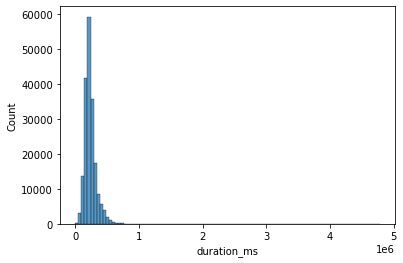

In [156]:
sns.histplot(df_songs.duration_ms, bins=100)

<AxesSubplot:xlabel='instrumentalness', ylabel='Count'>

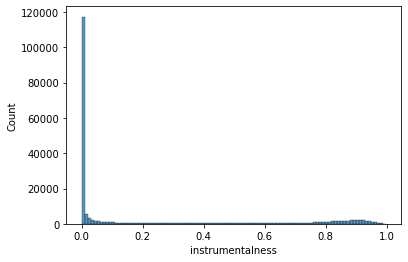

In [157]:
sns.histplot(df_songs.instrumentalness, bins=100)

"Instrumentalness" and "duration_ms" will be transformed to numeric type:

In [158]:
df_songs["instrumentalness"] = pd.to_numeric(df_songs["instrumentalness"])
df_songs["duration_ms"] = pd.to_numeric(df_songs["duration_ms"])

In [159]:
df_songs.dtypes

track_id             object
name                 object
artist               object
danceability        float64
energy              float64
key                  object
loudness            float64
mode                 object
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
duration_ms         float64
time_signature       object
main_genre           object
dtype: object

In [160]:
df_songs.isna().sum()

track_id                0
name                    0
artist                  0
danceability           14
energy                 14
key                    14
loudness               14
mode                   14
speechiness            14
acousticness           14
instrumentalness       14
liveness               14
valence                14
tempo                  14
duration_ms            14
time_signature         14
main_genre          74559
dtype: int64

In [161]:
df_songs[df_songs['key'].isna()]

,track_id,name,artist,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,main_genre
68,4fREYVupHFsPepnZeZrKI5,My Turn,Alyssa Trahan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
88,4LIfjUZIUcPfmr8FQuYW9L,Progressive Goa 2018 Top 100 Hits (2 Hr Psyche...,Doctor Spook,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1balIFsa2nXaQsaCW0Mlyq,"Goa Culture, Vol. 28 - In the Mix",Various Artists,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
47,1OegbevPjnz3BBlyzkBT4K,Mercy,Bossfight,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Electro
51,0M53v8Lw9remCNDXkwcLuN,A Gentle Day,Annie Locke,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50,59o6ojGNGJOYiVJSzC6Lsa,Memories (feat. Kid Cudi) - 2021 Remix,David Guetta,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Pop
17,6f4dPRxm7HOadw5v5CE2Ug,Spanglish,Logroz,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64,5auNDaHLvMKhq4OTSSSVkB,Yellow Coat,Friends & I,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16,2Md0TACRcG7RY2MIOA3S9o,Amanecer,Manuva,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1K3qfNiMOzI5cbILMuWnRN,Pajama Party (Cypher1),1096 Gang,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Drop NaNs:

In [162]:
print(df_songs.shape[0])
df_songs = df_songs.dropna()
print(df_songs.shape[0])

194301
119739


In [163]:
df_songs.isna().sum()

track_id            0
name                0
artist              0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration_ms         0
time_signature      0
main_genre          0
dtype: int64

## Check for duplicates:

In [164]:
sum(df_songs.duplicated())

0

## As a first approach, I'm gonna drop "track_id", "name" and "artist", since i wanna predict the genre based on the audio features. Though when using NLP the trackname and Author name could be helpfull

In [165]:
df_songs = df_songs.reset_index(drop=True)

In [166]:
df_songs = df_songs.drop(columns = ["track_id","name","artist"])

In [167]:
df_songs.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,main_genre
0,0.872,0.384,0,-16.204,1,0.0388,0.418,0.317000,0.0687,0.938,102.597,515000.0,4,Blues
1,0.699,0.633,11,-6.249,1,0.0261,0.436,0.000093,0.0291,0.907,91.398,167040.0,4,Blues
2,0.640,0.496,2,-11.124,1,0.0413,0.616,0.000046,0.1830,0.954,116.632,253333.0,4,Blues
3,0.572,0.348,0,-13.454,1,0.0293,0.438,0.000731,0.2350,0.340,73.303,275267.0,4,Blues
4,0.775,0.499,4,-7.181,1,0.0415,0.496,0.021900,0.1140,0.862,121.056,232707.0,4,Blues


In [168]:
df_songs.describe(include = "all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
danceability,119739,NaN,NaN,NaN,0.556901,0.17726,0,0.436,0.561,0.69,0.99
energy,119739,NaN,NaN,NaN,0.6924,0.234023,2.02e-05,0.542,0.738,0.888,1
key,119739,12,7,14293,NaN,NaN,NaN,NaN,NaN,NaN,NaN
loudness,119739,NaN,NaN,NaN,-7.68907,4.02761,-48.131,-9.5315,-6.692,-4.884,3.744
mode,119739,2,1,76632,NaN,NaN,NaN,NaN,NaN,NaN,NaN
speechiness,119739,NaN,NaN,NaN,0.0810534,0.0777408,0,0.0363,0.0511,0.0903,0.949
acousticness,119739,NaN,NaN,NaN,0.21895,0.288542,0,0.00451,0.0702,0.345,0.996
instrumentalness,119739,NaN,NaN,NaN,0.134626,0.277757,0,0,0.000184,0.0497,0.996
liveness,119739,NaN,NaN,NaN,0.206987,0.180213,0,0.0947,0.133,0.274,1
valence,119739,NaN,NaN,NaN,0.513785,0.258528,0,0.304,0.513,0.727,1


In [169]:
df_songs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119739 entries, 0 to 119738
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   danceability      119739 non-null  float64
 1   energy            119739 non-null  float64
 2   key               119739 non-null  object 
 3   loudness          119739 non-null  float64
 4   mode              119739 non-null  object 
 5   speechiness       119739 non-null  float64
 6   acousticness      119739 non-null  float64
 7   instrumentalness  119739 non-null  float64
 8   liveness          119739 non-null  float64
 9   valence           119739 non-null  float64
 10  tempo             119739 non-null  float64
 11  duration_ms       119739 non-null  float64
 12  time_signature    119739 non-null  object 
 13  main_genre        119739 non-null  object 
dtypes: float64(10), object(4)
memory usage: 12.8+ MB


In [170]:
df_songs.to_pickle('songlist_with_features_clean_all_genres.pickle')